In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("./Data/AAPL.xls")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700


In [5]:
# EDA
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB
None
               Open          High           Low         Close     Adj Close  \
count  10409.000000  10409.000000  10409.000000  10409.000000  10409.000000   
mean      13.959910     14.111936     13.809163     13.966757     13.350337   
std       30.169244     30.514878     29.835055     30.191696     29.911132   
min        0.049665      0.049665      0.049107      0.049107      0.038384   
25%        0.281964      0.287946      0.274554      0.281250      0

In [6]:
 # Set Date column as the index for time series operation
df.index = pd.to_datetime(df.index)

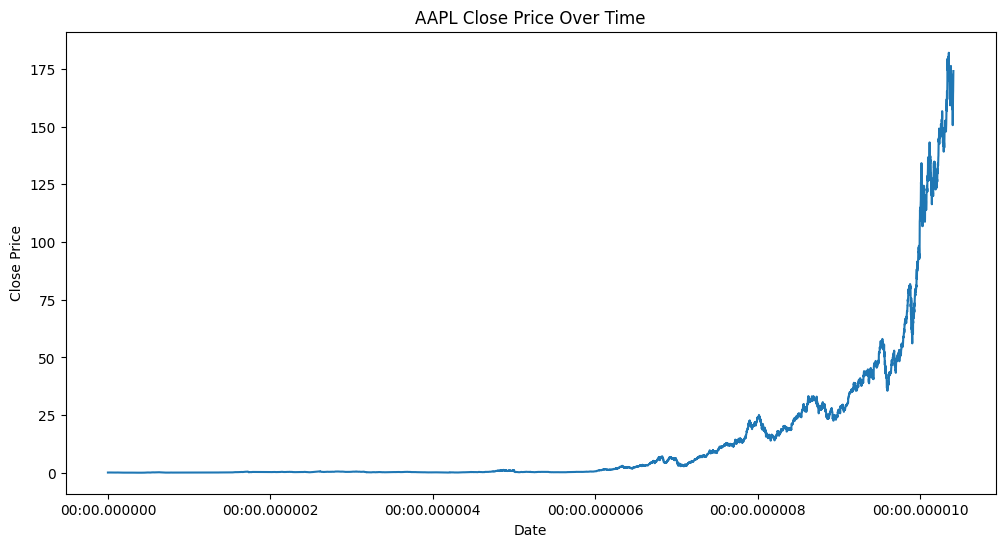

In [7]:
# Plot Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

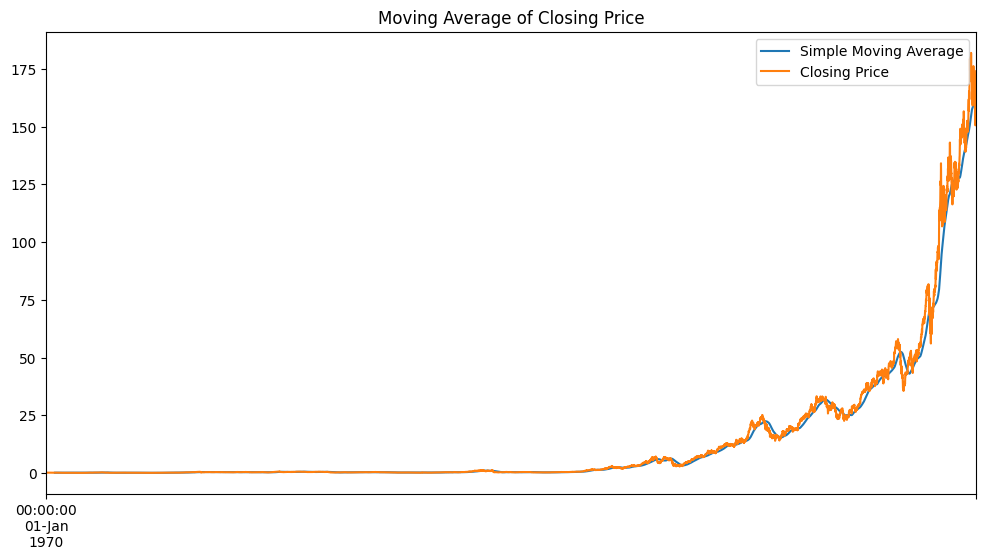

In [8]:
simple_ma = df["Close"].rolling(window=100).mean()

plt.figure(figsize=(12,6))
simple_ma.plot(label="Simple Moving Average")
df["Close"].plot(label="Closing Price")
plt.xticks(rotation=0)
plt.title("Moving Average of Closing Price", size=12)
plt.legend()
plt.show()

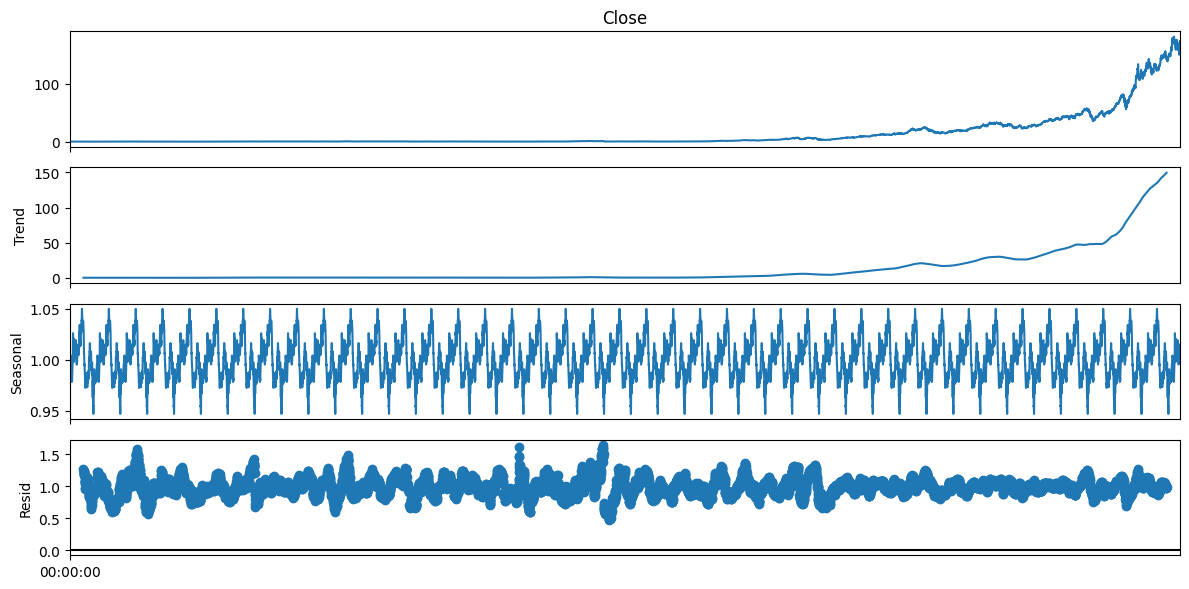

In [9]:
results = seasonal_decompose(df["Close"], model="multiplicative", period=252)
fig = results.plot()
fig.set_size_inches(12, 6)
fig.tight_layout()
plt.show()

In [10]:
# Check stationarity for Close
result = adfuller(df['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 5.648370305623165
p-value: 1.0


In [11]:
# Non stationary series as p > 0.05 
# Create differenced series for ARIMA
df['Close_diff'] = df['Close'].diff()

In [12]:
result = adfuller(df['Close_diff'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -15.048649473685908
p-value: 9.363664455754714e-28


In [13]:
# Time-based split: 70% train, 15% dev, 15% test
train_size = int(len(df) * 0.7)
dev_size = int(len(df) * 0.15)
test_size = len(df) - train_size - dev_size

train = df.iloc[:train_size]
dev = df.iloc[train_size:train_size + dev_size]
test = df.iloc[train_size + dev_size:]

print(f'Train: {len(train)}, Dev: {len(dev)}, Test: {len(test)}')

Train: 7286, Dev: 1561, Test: 1562


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Use (1,1,1) for demonstration (based on common choice; in practice, use auto_arima or ACF/PACF)
arima_model = ARIMA(train['Close'], order=(1, 1, 1)).fit()
print(arima_model.summary())

# Forecast on dev set for tuning (optional)
arima_forecast_dev = arima_model.forecast(steps=len(dev))

/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7286
Model:                 ARIMA(1, 1, 1)   Log Likelihood               12150.905
Date:                Sat, 04 Oct 2025   AIC                         -24295.810
Time:                        21:32:53   BIC                         -24275.129
Sample:                    01-01-1970   HQIC                        -24288.698
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4850      0.314     -1.542      0.123      -1.101       0.131
ma.L1          0.4926      0.313      1.572      0.116      -0.122       1.107
sigma2         0.0021    7.3e-06    285.373      0.0

In [15]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from numpy import array

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
dev_scaled = scaler.transform(dev['Close'].values.reshape(-1, 1))
test_scaled = scaler.transform(test['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length=60):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:(i + seq_length)])
        ys.append(data[i + seq_length])
    return array(xs), array(ys)

seq_length = 60
X_train, y_train = create_sequences(train_scaled, seq_length)
X_dev, y_dev = create_sequences(dev_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_dev = torch.from_numpy(X_dev).float()
y_dev = torch.from_numpy(y_dev).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# LSTM Model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        return self.linear(lstm_out.view(len(input_seq), -1))[-1]

lstm_model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

# Train
epochs = 20
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        lstm_model.hidden_cell = (torch.zeros(1, 1, lstm_model.hidden_layer_size),
                                  torch.zeros(1, 1, lstm_model.hidden_layer_size))
        y_pred = lstm_model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
    print(f'Epoch {i+1} loss: {single_loss.item()}')

# Forecast on dev set
lstm_model.eval()
lstm_forecast_dev = []
for seq in X_dev:
    with torch.no_grad():
        lstm_model.hidden_cell = (torch.zeros(1, 1, lstm_model.hidden_layer_size),
                                  torch.zeros(1, 1, lstm_model.hidden_layer_size))
        lstm_forecast_dev.append(lstm_model(seq).item())
lstm_forecast_dev = scaler.inverse_transform(np.array(lstm_forecast_dev).reshape(-1, 1))

Epoch 1 loss: 2.7092391974292696e-05
Epoch 2 loss: 3.508190275169909e-06
Epoch 3 loss: 2.283296453242656e-05
Epoch 4 loss: 0.0015278819482773542
Epoch 5 loss: 2.0327604943304323e-05
Epoch 6 loss: 0.00041391790728084743
Epoch 7 loss: 0.00034910187241621315
Epoch 8 loss: 0.0015700121875852346
Epoch 9 loss: 0.0013638795353472233
Epoch 10 loss: 0.0011981679126620293
Epoch 11 loss: 0.0011984651209786534
Epoch 12 loss: 0.000493302708491683
Epoch 13 loss: 0.00031372750527225435
Epoch 14 loss: 9.162944479612634e-05
Epoch 15 loss: 0.00010081088112201542
Epoch 16 loss: 0.0001178120292024687
Epoch 17 loss: 0.00013075587048660964
Epoch 18 loss: 0.00015622585488017648
Epoch 19 loss: 0.00018322265532333404
Epoch 20 loss: 0.00017500045942142606


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Rolling window for ARIMA (re-fit on rolling basis for accuracy)
arima_predictions = []
history = list(train['Close'])
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    history.append(test['Close'].iloc[t])

# Rolling for LSTM (use previous predictions as input for next, but for simplicity, use actual previous for demonstration)
lstm_predictions = []
input_seq = X_test[0]  # Start with first sequence
for t in range(len(test) - seq_length):
    with torch.no_grad():
        lstm_model.hidden_cell = (torch.zeros(1, 1, lstm_model.hidden_layer_size),
                                  torch.zeros(1, 1, lstm_model.hidden_layer_size))
        yhat = lstm_model(torch.from_numpy(input_seq).float())
    lstm_predictions.append(yhat.item())
    input_seq = np.append(input_seq[1:], yhat.item())  # Roll the window
lstm_predictions = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1))

# Align lengths if needed (due to seq_length)
actual_test = test['Close'].values[seq_length:seq_length + len(lstm_predictions)]

# Calculate metrics
rmse_arima = np.sqrt(mean_squared_error(test['Close'], arima_predictions))
mape_arima = mean_absolute_percentage_error(test['Close'], arima_predictions)

rmse_lstm = np.sqrt(mean_squared_error(actual_test, lstm_predictions))
mape_lstm = mean_absolute_percentage_error(actual_test, lstm_predictions)

/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/abir/Repos/Time-Series-Forecasting-AAPL/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to co

TypeError: expected np.ndarray (got Tensor)

In [ ]:
# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, arima_predictions, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

# Plot LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index[seq_length:seq_length + len(lstm_predictions)], actual_test, label='Actual')
plt.plot(test.index[seq_length:seq_length + len(lstm_predictions)], lstm_predictions, label='LSTM Forecast')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()

In [ ]:
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM'],
    'RMSE': [rmse_arima, rmse_lstm],
    'MAPE': [mape_arima, mape_lstm]
})
print(comparison)